In [1]:
#!/usr/bin/env python
import os
import sys
if os.path.exists('/home/chieh/code/wPlotLib'):
	sys.path.insert(0,'/home/chieh/code/wPlotLib')
if os.path.exists('/home/chieh/code/wuML'):
	sys.path.insert(0,'/home/chieh/code/wuML')
import wuml 
import numpy as np
import scipy.stats
from wplotlib import histograms
from wplotlib import lines
	

In [2]:
data = wuml.wData(X_npArray=np.random.randn(1000))
Pₓ = wuml.KDE(data)

In [3]:
X = np.arange(-3,3,0.05)
realProb = scipy.stats.norm(0, 1).pdf(X)
estimatedProb = Pₓ(X)
newX = Pₓ.generate_samples(300)
cdf_val = Pₓ.integrate(-7, 0)		# you can get the cdf by integration.
Pₓ.save('kde.model')				# save the model for later usage
wuml.jupyter_print('Half of the distribution should yield 0.5, and we got %.3f'%cdf_val)

lot out the result

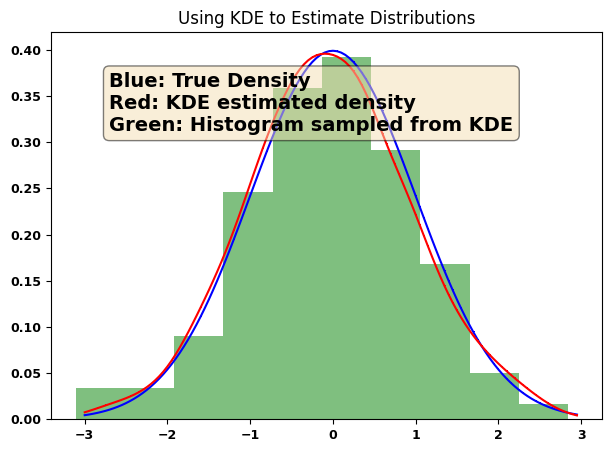

In [4]:
textstr = 'Blue: True Density\nRed: KDE estimated density\nGreen: Histogram sampled from KDE'
lp = lines(X,realProb, color='blue', marker=',', show=False)
lines(X,estimatedProb, color='red', marker=',', imgText=textstr, show=False)
histograms(newX, num_bins=10, title='Using KDE to Estimate Distributions', facecolor='green', α=0.5, normalize=True)

Reload the model later

In [5]:
Pₓ2 = wuml.KDE(load_model_path='kde.model')
estimatedProb = Pₓ2(X)
newX = Pₓ2.generate_samples(300)
cdf_val = Pₓ2.integrate(-7, 0)		# you can get the cdf by integration.

lot out the result from saved model, should be the same

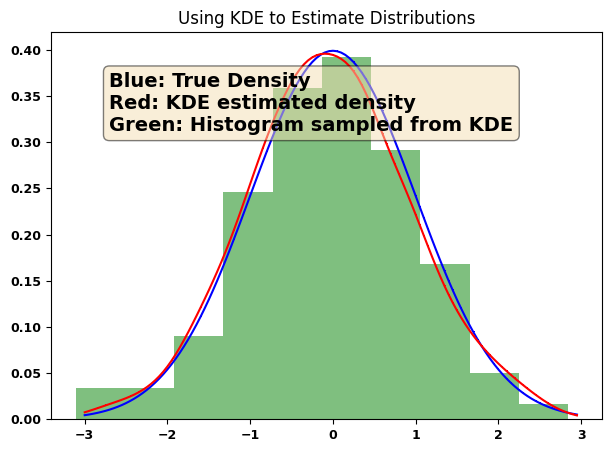

In [6]:
textstr = 'Blue: True Density\nRed: KDE estimated density\nGreen: Histogram sampled from KDE'
lp = lines(X,realProb, color='blue', marker=',', show=False)
lines(X,estimatedProb, color='red', marker=',', imgText=textstr, show=False)
histograms(newX, num_bins=10, title='Using KDE to Estimate Distributions', facecolor='green', α=0.5, normalize=True)